<a href="https://colab.research.google.com/github/ShafeeqAhamedS/Ex1-AAI/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pybbn

  Preparing metadata (setup.py) ... done
  Created wheel for pybbn: filename=pybbn-3.2.3-py3-none-any.whl size=40374 sha256=fa7d5cf0bf174b06aa68a21111f75bc7cc3ffafb3f703bf3f1b542417aee1957
  Stored in directory: /root/.cache/pip/wheels/a7/6f/f1/ec7566a4882ab5c796fb43dfd84062769f75ba5381ca60d2b6
Successfully built pybbn


In [3]:
# Import required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pybbn.graph.dag import Bbn
from pybbn.graph.dag import Edge,EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController
pd.options.display.max_columns=50

# Read the dataset
df=pd.read_csv('weatherAUS.csv',encoding='utf-8')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
# Remove row which contain output(RainTomorrow) NA
df=df[pd.isnull(df['RainTomorrow'])==False]

In [8]:
from sklearn.preprocessing import LabelEncoder


# Label Encoding for string columns
# Create a LabelEncoder object
le = LabelEncoder()

# Select only string columns for encoding
string_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each string column
for col in string_cols:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3430,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0
145455,3431,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3432,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,3433,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0


In [9]:
# Filling missing values
df=df.fillna(df.mean())

In [10]:
# Creating bands for variable
df['WindGustSpeedCat']=df['WindGustSpeed'].apply(lambda x: '0.<=40'   if x<=40 else '1.40-50' if 40<x<=50 else '2.>50')
df['Humidity9amCat']=df['Humidity9am'].apply(lambda x: '1.>60' if x>60 else '0.<=60')
df['Humidity3pmCat']=df['Humidity3pm'].apply(lambda x: '1.>60' if x>60 else '0.<=60')
print(df)

        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        396         2     13.4     22.9       0.6     5.469824  7.624853   
1        397         2      7.4     25.1       0.0     5.469824  7.624853   
2        398         2     12.9     25.7       0.0     5.469824  7.624853   
3        399         2      9.2     28.0       0.0     5.469824  7.624853   
4        400         2     17.5     32.3       1.0     5.469824  7.624853   
...      ...       ...      ...      ...       ...          ...       ...   
145454  3430        41      3.5     21.8       0.0     5.469824  7.624853   
145455  3431        41      2.8     23.4       0.0     5.469824  7.624853   
145456  3432        41      3.6     25.3       0.0     5.469824  7.624853   
145457  3433        41      5.4     26.9       0.0     5.469824  7.624853   
145458  3434        41      7.8     27.0       0.0     5.469824  7.624853   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \

In [11]:
# Function to calculate probabilities
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob

In [12]:
# Creating BBN network
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), probs(df, child='Humidity9amCat'))
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), probs(df, child='Humidity3pmCat', parent1='Humidity9amCat'))
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), probs(df, child='WindGustSpeedCat'))
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat'))


In [13]:
bbn = Bbn() \
    .add_node(H9am) \
    .add_node(H3pm) \
    .add_node(W) \
    .add_node(RT) \
    .add_edge(Edge(H9am, H3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(H3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W, RT, EdgeType.DIRECTED))

In [14]:
join_tree = InferenceController.apply(bbn)
pos={0: (-1,0), 1: (-1, 0.5), 2: (1, 0), 3:(0,-0.5)}

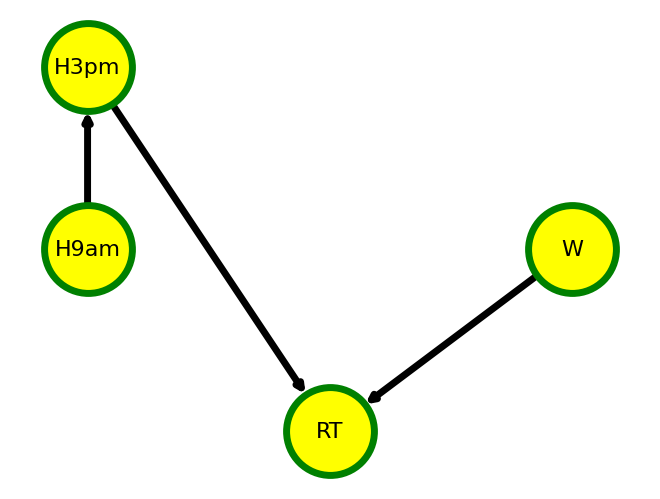

In [15]:
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "yellow",
    "edgecolors": "green",
    "edge_color": "black",
    "linewidths": 5,
    "width": 5,}


n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()